In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

</font> <img src="Banner2.png" width="900" height="250" align="center"/>

</font> <img src="TeamC.png" width="800" height=500 align="center"/>

# <font color=li_blue> Table of contents </font>

# <font color=purple> Sections </font>

* [1.Libaries used](#1)
* [2.Libaries used](#2)
* [3. Setup](#3)
  * [3.1 Start MariaDB](#3.1)
  * [3.2 Start Hadoop](#3.2)  
  * [3.3 Search for Spark Installation](#3.3)
  * [3.4 Create SparkSession](#3.4)
  * [3.5 Data Preparation](#3.5)
      * [3.5.1 Raw DataFrame](#3.5.1)
      * [3.5.2 DataFrame Vertices](#3.5.2)
      * [3.5.3 Countries Dataframe Vertices](#3.5.3)
      * [3.5.4 Countries Flows Dataframe](#3.5.4)
          * [3.5.4.1 Detailed Graph](#3.5.4.1)
      * [3.5.5 Country Aggregated Graph](#3.5.5)

<a id='1'></a>
# <font color=purple> 1. Libraries used </font>

In [71]:
import csv
import pandas as pd
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap,stat_summary,theme_bw
from plotnine import ggplot, aes, geom_bar, coord_flip,labs
from plotnine import *
import numpy as np
import pandas as pd
import plotnine
from plotnine import *
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import math
import warnings
warnings.filterwarnings('ignore')
from plotnine import *
from plotnine.data import mpg
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import animation
import matplotlib.pyplot as plt


<div class="alert alert-info" role="alert">

Adding country specific, GDP, PPP and income data from the world bank to the dataframe.  
  
</div>

In [3]:
df = pd.read_csv('madrid_transactions_country.csv', delimiter=';', skiprows=0, low_memory=False)

In [4]:
df.columns

Index(['records', 'amount', 'category', 'customer_country', 'daytime', 'hour',
       'tx_date_proc', 'weekday', 'Date_new ', 'numericcode',
       'latitude(average)', 'longitude(average)', 'country_name', 'alpha-3',
       'country_code', 'iso_3166-2', 'region', 'sub_region', 'GDP_USD_2012',
       'GDP per capita (constant 2015 US$)',
       'GDP, PPP (current international $)', 'GDP growth (annual %)',
       'Income_classification', 'PPP_2012',
       'Gross domestic income (constant LCU)',
       'Adjusted net national income per capita (constant 2015 US$)',
       'GNI per capita, PPP (current international $)'],
      dtype='object')

In [5]:
pd.set_option('display.max_columns', None)
df.head()

records  amount            category customer_country    daytime  hour  \
0        1   33.46     Fashion & Shoes               GB      Night    21   
1        2   59.97     Fashion & Shoes               GB  Afternoon    16   
2        3   49.99     Fashion & Shoes               CN    Evening    17   
3        4    5.95     Fashion & Shoes               GB    Evening    17   
4        5   16.65  Bars & restaurants               DK      Night    22   

             tx_date_proc    weekday       Date_new  numericcode  \
0  2012-03-01 21:51:54+00  thursday   01.03.12 21:51         826   
1  2012-03-02 16:12:52+00  friday     02.03.12 16:12         826   
2  2012-03-02 17:34:01+00  friday     02.03.12 17:34         156   
3  2012-03-01 17:43:29+00  thursday   01.03.12 17:43         826   
4  2012-03-01 22:47:52+00  thursday   01.03.12 22:47         208   

   latitude(average)  longitude(average)     country_name alpha-3  \
0                NaN                -2.0  United Kingdom      GBR   
1               54.0                -2.0  United Kingdom      GBR   
2               35.0               105.0            China     CHN   
3               54.0                -2.0  United Kingdom      GBR   
4               56.0                10.0          Denmark     DNK   

   country_code     iso_3166-2  region       sub_region   GDP_USD_2012  \
0           826  ISO 3166-2:GB  Europe  Northern Europe  2719158341006   
1           826  ISO 3166-2:GB  Europe  Northern Europe  2719158341006   
2           156  ISO 3166-2:CN    Asia     Eastern Asia  8532229986994   
3           826  ISO 3166-2:GB  Europe  Northern Europe  2719158341006   
4           208  ISO 3166-2:DK  Europe  Northern Europe   327148943812   

   GDP per capita (constant 2015 US$)  GDP, PPP (current international $)  \
0                               43100                        2.453352e+12   
1                               43100                        2.453352e+12   
2                                6592                        1.512454e+13   
3                               43100                        2.453352e+12   
4                               51567                        2.505246e+11   

   GDP growth (annual %) Income_classification PPP_2012  \
0               1.469888           High income     0.70   
1               1.469888           High income     0.70   
2               7.863736  Upper middle income      3.56   
3               1.469888           High income     0.70   
4               0.226500           High income     7.56   

  Gross domestic income (constant LCU)  \
0                        1769649482466   
1                        1769649482466   
2                                   ..   
3                        1769649482466   
4                        1909813185266   

  Adjusted net national income per capita (constant 2015 US$)  \
0                                              35265            
1                                              35265            
2                                               4997            
3                                              35265            
4                                              42430            

   GNI per capita, PPP (current international $)  
0                                          38120  
1                                          38120  
2                                          11140  
3                                          38120  
4                                          45820

<div class="alert alert-info" role="alert">

Statistics to see the distribution of the numeric columns  
  
</div>

In [6]:
df.describe()

records        amount          hour  latitude(average)  \
count  10793.000000  10793.000000  10793.000000       10781.000000   
mean    5397.000000    108.735644     15.032428          36.377767   
std     3115.815062    310.303331      4.809074          23.721422   
min        1.000000      0.040000      0.000000         -41.000000   
25%     2699.000000     19.900000     12.000000          35.000000   
50%     5397.000000     39.990000     16.000000          42.500000   
75%     8095.000000     92.680000     18.000000          52.500000   
max    10793.000000  15000.000000     23.000000          65.000000   

       longitude(average)  country_code  GDP_USD_2012  \
count        10782.000000  10793.000000  1.079300e+04   
mean            -2.871369    480.415084  4.066684e+12   
std             67.542173    285.287340  5.548015e+12   
min           -172.333300      0.000000  7.605496e+08   
25%            -64.000000    250.000000  4.985236e+11   
50%              2.000000    410.000000  2.086958e+12   
75%             25.000000    818.000000  2.719158e+12   
max            174.000000    882.000000  1.625397e+13   

       GDP per capita (constant 2015 US$)  GDP, PPP (current international $)  \
count                        10793.000000                        1.070600e+04   
mean                         34111.388770                        4.411083e+12   
std                          19608.625647                        5.871824e+12   
min                            362.000000                        0.000000e+00   
25%                          12986.000000                        4.697206e+11   
50%                          36183.000000                        2.172384e+12   
75%                          48886.000000                        3.480299e+12   
max                         104488.000000                        1.625397e+13   

       GDP growth (annual %)  GNI per capita, PPP (current international $)  
count           10793.000000                                   10793.000000  
mean                1.678976                                   35716.519040  
std                 2.622192                                   16638.373106  
min                -7.086697                                       0.000000  
25%                 0.313135                                   20620.000000  
50%                 1.762223                                   38500.000000  
75%                 2.402531                                   46500.000000  
max                16.665429                                  132440.000000

<div class="alert alert-info" role="alert">

Heatmap shows from which countries the trasactions are coming from. Clearly, high income countries having transactions in all categories. And low income almost none and only in few categories like sports&Games, Health, Fashion & SHoes, Bar & Restaurants and Accomodation. 
  
</div>

<a id='2'></a>
# <font color=purple> 2. New Dataframes </font>

<div class="alert alert-info" role="alert">

Creating new aggregation of dataframes nfor further analysis
  
</div>

<a id='2.1'></a>
### <font color=li_blue> 2.1. Country and category </font>

In [7]:
# new df by country and category
df1 =df.groupby(['country_name', 'category','Income_classification'],as_index=False).agg(
    # Get max of the duration column for each group
    mean_amount=('amount','mean'),
    # Get min of the duration column for each group
    sum_amount=('amount', sum),
    # Get sum of the duration column for each group
    count_amount=('amount', 'count'),
    # Apply mean of growth(should give the real growth)
    growth_GDP=('GDP growth (annual %)', 'mean'),
)

In [8]:
sales = df1.groupby(['category'])['sum_amount'].sum().reset_index()

In [9]:
df1 = df1.merge(sales, left_on='category', right_on ='category', how = 'left')

In [10]:
df1

country_name            category  \
0                               Algeria     Fashion & Shoes   
1                               Algeria              Health   
2                               Andorra       Accommodation   
3                               Andorra          Automocion   
4                               Andorra  Bars & restaurants   
..                                  ...                 ...   
612  Venezuela (Bolivarian Republic of)   Personal products   
613  Venezuela (Bolivarian Republic of)      Sports & Games   
614                            Viet Nam     Fashion & Shoes   
615                            Viet Nam              Health   
616                            Zimbabwe     Fashion & Shoes   

    Income_classification  mean_amount  sum_amount_x  count_amount  \
0    Upper middle income    197.095000       1182.57             6   
1    Upper middle income    216.620000        216.62             1   
2             High income   130.350000        521.40             4   
3             High income   390.120000        390.12             1   
4             High income    57.456316       2183.34            38   
..                    ...          ...           ...           ...   
612  Upper middle income      9.750000         19.50             2   
613  Upper middle income     74.000000         74.00             1   
614  Lower middle income    648.525000       1297.05             2   
615  Lower middle income    206.400000        206.40             1   
616            Low income   127.000000        127.00             1   

     growth_GDP  sum_amount_y  
0      3.400000     494213.51  
1      3.400000      26579.35  
2     -4.974444     282511.31  
3     -4.974444       1815.20  
4     -4.974444     201943.50  
..          ...           ...  
612    5.625957       6972.28  
613    5.625957       7919.97  
614    5.500000     494213.51  
615    5.500000      26579.35  
616   16.665429     494213.51  

[617 rows x 8 columns]

<a id='2.2'></a>
### <font color=li_blue> 2.2. Category </font>

In [11]:
# new df by category
df3 =df.groupby(['category'],as_index=False).agg(
    # Get max of the duration column for each group
    mean_amount=('amount','mean'),
    # Get min of the duration column for each group
    sum_amount=('amount', sum),
    # Get sum of the duration column for each group
    count_amount=('amount', 'count'),
)

In [12]:
df3

category  mean_amount  sum_amount  count_amount
0              Accommodation   256.362350   282511.31          1102
1         Agencias de viajes   303.284000     1516.42             5
2                 Automocion   302.533333     1815.20             6
3         Bars & restaurants    76.551744   201943.50          2638
4              Books & Music   226.359892    21051.47            93
5          Culture & Leisure   258.122609    23747.28            92
6    Electronics & computing    46.234314     2357.95            51
7            Fashion & Shoes    91.998047   494213.51          5372
8                       Food    91.228690    13228.16           145
9                     Health    48.414117    26579.35           549
10          Hogar y reformas    58.872625     4709.81            80
11  Other goods and services   131.987964    29169.34           221
12         Personal products    50.892555     6972.28           137
13            Sports & Games    92.092674     7919.97            86
14            Transportation   258.556759    55848.26           216

<a id='2.3'></a>
### <font color=li_blue> 2.3. Create for specific country by category </font>

In [13]:
total = df3.drop(columns =['count_amount'])

In [14]:
#rename columns
total.rename(columns = {'mean_amount':'total_mean_amount'}, inplace = True)
total.rename(columns = {'sum_amount':'sum_mean_amount'}, inplace = True)
total

category  total_mean_amount  sum_mean_amount
0              Accommodation         256.362350        282511.31
1         Agencias de viajes         303.284000          1516.42
2                 Automocion         302.533333          1815.20
3         Bars & restaurants          76.551744        201943.50
4              Books & Music         226.359892         21051.47
5          Culture & Leisure         258.122609         23747.28
6    Electronics & computing          46.234314          2357.95
7            Fashion & Shoes          91.998047        494213.51
8                       Food          91.228690         13228.16
9                     Health          48.414117         26579.35
10          Hogar y reformas          58.872625          4709.81
11  Other goods and services         131.987964         29169.34
12         Personal products          50.892555          6972.28
13            Sports & Games          92.092674          7919.97
14            Transportation         258.556759         55848.26

In [15]:
df4 =df.groupby(['country_name', 'category'],as_index=False).agg(
    # Get max of the duration column for each group
    mean_amount=('amount','mean'),
)

In [16]:
US_sales = df4[df4["country_name"].str.contains('United States of America')]
US_sales.rename(columns = {'mean_amount':'US_mean_amount'}, inplace = True)
FR_sales = df4[df4["country_name"].str.match('France')]
FR_sales.rename(columns = {'mean_amount':'FR_mean_amount'}, inplace = True)
CN_sales = df4[df4["country_name"].str.match('China')]
CN_sales.rename(columns = {'mean_amount':'CN_mean_amount'}, inplace = True)

UK_sales = df4[df4["country_name"].str.match('United Kingdom ')]
UK_sales.rename(columns = {'mean_amount':'UK_mean_amount'}, inplace = True)

#US_sales = df1.groupby('category').filter(lambda x: (x["country_name"] == ['United States of America']).any())
#FR_sales = df1.groupby(['France'])['sum_amount'].sum().reset_index()
#CH_sales = df1.groupby(['China'])['sum_amount'].sum().reset_index()

In [17]:
US_sales 

country_name                  category  US_mean_amount
584  United States of America             Accommodation      258.664463
585  United States of America        Bars & restaurants       54.644318
586  United States of America             Books & Music      202.911667
587  United States of America         Culture & Leisure      565.555000
588  United States of America   Electronics & computing       22.375000
589  United States of America           Fashion & Shoes       59.601379
590  United States of America                      Food       58.504000
591  United States of America                    Health       29.070345
592  United States of America          Hogar y reformas       47.510833
593  United States of America  Other goods and services       53.200000
594  United States of America         Personal products       46.051000
595  United States of America            Sports & Games      139.222500
596  United States of America            Transportation      657.099643

In [18]:
US_FR = US_sales.merge(FR_sales, left_on='category', right_on ='category', how = 'left')
US_FR = US_FR.merge(CN_sales,left_on='category', right_on ='category', how = 'left')
US_FR = US_FR.merge(total,left_on='category', right_on ='category', how = 'left')
US_FR = US_FR.merge(UK_sales,left_on='category', right_on ='category', how = 'left')
US_FR = US_FR.fillna(0)

In [19]:
US_FR

country_name_x                  category  US_mean_amount  \
0   United States of America             Accommodation      258.664463   
1   United States of America        Bars & restaurants       54.644318   
2   United States of America             Books & Music      202.911667   
3   United States of America         Culture & Leisure      565.555000   
4   United States of America   Electronics & computing       22.375000   
5   United States of America           Fashion & Shoes       59.601379   
6   United States of America                      Food       58.504000   
7   United States of America                    Health       29.070345   
8   United States of America          Hogar y reformas       47.510833   
9   United States of America  Other goods and services       53.200000   
10  United States of America         Personal products       46.051000   
11  United States of America            Sports & Games      139.222500   
12  United States of America            Transportation      657.099643   

   country_name_y  FR_mean_amount country_name_x  CN_mean_amount  \
0          France      215.760114          China      433.425484   
1          France       49.686941          China      178.751475   
2          France       41.713333              0        0.000000   
3          France       32.966667          China        4.000000   
4          France       58.230000              0        0.000000   
5          France       50.868313          China      250.171860   
6          France       24.535000          China      170.183333   
7          France       58.148500          China      101.095000   
8          France       72.817143          China       13.980000   
9          France      112.642955          China      254.250000   
10         France       73.335500          China       50.664286   
11         France       49.925000          China      225.000000   
12         France       43.702917          China       49.220000   

    total_mean_amount  sum_mean_amount   country_name_y  UK_mean_amount  
0          256.362350        282511.31  United Kingdom       191.574722  
1           76.551744        201943.50  United Kingdom        77.108534  
2          226.359892         21051.47  United Kingdom       111.000000  
3          258.122609         23747.28  United Kingdom      1058.580000  
4           46.234314          2357.95  United Kingdom       113.350000  
5           91.998047        494213.51  United Kingdom        59.290387  
6           91.228690         13228.16  United Kingdom       613.267273  
7           48.414117         26579.35  United Kingdom        66.107632  
8           58.872625          4709.81  United Kingdom        65.976667  
9          131.987964         29169.34  United Kingdom       129.350800  
10          50.892555          6972.28  United Kingdom        50.583333  
11          92.092674          7919.97  United Kingdom        51.885714  
12         258.556759         55848.26  United Kingdom        39.728421

In [20]:
df1 = df1.merge(sales, left_on='category', right_on ='category', how = 'left')

In [21]:
df1

country_name            category  \
0                               Algeria     Fashion & Shoes   
1                               Algeria              Health   
2                               Andorra       Accommodation   
3                               Andorra          Automocion   
4                               Andorra  Bars & restaurants   
..                                  ...                 ...   
612  Venezuela (Bolivarian Republic of)   Personal products   
613  Venezuela (Bolivarian Republic of)      Sports & Games   
614                            Viet Nam     Fashion & Shoes   
615                            Viet Nam              Health   
616                            Zimbabwe     Fashion & Shoes   

    Income_classification  mean_amount  sum_amount_x  count_amount  \
0    Upper middle income    197.095000       1182.57             6   
1    Upper middle income    216.620000        216.62             1   
2             High income   130.350000        521.40             4   
3             High income   390.120000        390.12             1   
4             High income    57.456316       2183.34            38   
..                    ...          ...           ...           ...   
612  Upper middle income      9.750000         19.50             2   
613  Upper middle income     74.000000         74.00             1   
614  Lower middle income    648.525000       1297.05             2   
615  Lower middle income    206.400000        206.40             1   
616            Low income   127.000000        127.00             1   

     growth_GDP  sum_amount_y  sum_amount  
0      3.400000     494213.51   494213.51  
1      3.400000      26579.35    26579.35  
2     -4.974444     282511.31   282511.31  
3     -4.974444       1815.20     1815.20  
4     -4.974444     201943.50   201943.50  
..          ...           ...         ...  
612    5.625957       6972.28     6972.28  
613    5.625957       7919.97     7919.97  
614    5.500000     494213.51   494213.51  
615    5.500000      26579.35    26579.35  
616   16.665429     494213.51   494213.51  

[617 rows x 9 columns]

In [22]:
df1['market_share_ctry'] = (df1['sum_amount_x']/df1['sum_amount_y'])

In [23]:
df1

country_name            category  \
0                               Algeria     Fashion & Shoes   
1                               Algeria              Health   
2                               Andorra       Accommodation   
3                               Andorra          Automocion   
4                               Andorra  Bars & restaurants   
..                                  ...                 ...   
612  Venezuela (Bolivarian Republic of)   Personal products   
613  Venezuela (Bolivarian Republic of)      Sports & Games   
614                            Viet Nam     Fashion & Shoes   
615                            Viet Nam              Health   
616                            Zimbabwe     Fashion & Shoes   

    Income_classification  mean_amount  sum_amount_x  count_amount  \
0    Upper middle income    197.095000       1182.57             6   
1    Upper middle income    216.620000        216.62             1   
2             High income   130.350000        521.40             4   
3             High income   390.120000        390.12             1   
4             High income    57.456316       2183.34            38   
..                    ...          ...           ...           ...   
612  Upper middle income      9.750000         19.50             2   
613  Upper middle income     74.000000         74.00             1   
614  Lower middle income    648.525000       1297.05             2   
615  Lower middle income    206.400000        206.40             1   
616            Low income   127.000000        127.00             1   

     growth_GDP  sum_amount_y  sum_amount  market_share_ctry  
0      3.400000     494213.51   494213.51           0.002393  
1      3.400000      26579.35    26579.35           0.008150  
2     -4.974444     282511.31   282511.31           0.001846  
3     -4.974444       1815.20     1815.20           0.214918  
4     -4.974444     201943.50   201943.50           0.010812  
..          ...           ...         ...                ...  
612    5.625957       6972.28     6972.28           0.002797  
613    5.625957       7919.97     7919.97           0.009343  
614    5.500000     494213.51   494213.51           0.002624  
615    5.500000      26579.35    26579.35           0.007765  
616   16.665429     494213.51   494213.51           0.000257  

[617 rows x 10 columns]

In [24]:
#df1[df1.category == ('Health')]
df1.columns

Index(['country_name', 'category', 'Income_classification', 'mean_amount',
       'sum_amount_x', 'count_amount', 'growth_GDP', 'sum_amount_y',
       'sum_amount', 'market_share_ctry'],
      dtype='object')

New column for country classification only 

In [25]:
#max market share to calculate the relative market share, metric that shows a countries position in the market compared to its main competitor.
df1['max_ms'] = df1.groupby(['category'])['market_share_ctry'].transform(max)
df1['relative_MS'] = (df1['market_share_ctry']/df1['max_ms'])

In [26]:
df1

country_name            category  \
0                               Algeria     Fashion & Shoes   
1                               Algeria              Health   
2                               Andorra       Accommodation   
3                               Andorra          Automocion   
4                               Andorra  Bars & restaurants   
..                                  ...                 ...   
612  Venezuela (Bolivarian Republic of)   Personal products   
613  Venezuela (Bolivarian Republic of)      Sports & Games   
614                            Viet Nam     Fashion & Shoes   
615                            Viet Nam              Health   
616                            Zimbabwe     Fashion & Shoes   

    Income_classification  mean_amount  sum_amount_x  count_amount  \
0    Upper middle income    197.095000       1182.57             6   
1    Upper middle income    216.620000        216.62             1   
2             High income   130.350000        521.40             4   
3             High income   390.120000        390.12             1   
4             High income    57.456316       2183.34            38   
..                    ...          ...           ...           ...   
612  Upper middle income      9.750000         19.50             2   
613  Upper middle income     74.000000         74.00             1   
614  Lower middle income    648.525000       1297.05             2   
615  Lower middle income    206.400000        206.40             1   
616            Low income   127.000000        127.00             1   

     growth_GDP  sum_amount_y  sum_amount  market_share_ctry    max_ms  \
0      3.400000     494213.51   494213.51           0.002393  0.122501   
1      3.400000      26579.35    26579.35           0.008150  0.131264   
2     -4.974444     282511.31   282511.31           0.001846  0.221573   
3     -4.974444       1815.20     1815.20           0.214918  0.625165   
4     -4.974444     201943.50   201943.50           0.010812  0.166685   
..          ...           ...         ...                ...       ...   
612    5.625957       6972.28     6972.28           0.002797  0.210363   
613    5.625957       7919.97     7919.97           0.009343  0.210944   
614    5.500000     494213.51   494213.51           0.002624  0.122501   
615    5.500000      26579.35    26579.35           0.007765  0.131264   
616   16.665429     494213.51   494213.51           0.000257  0.122501   

     relative_MS  
0       0.019533  
1       0.062088  
2       0.008329  
3       0.343779  
4       0.064863  
..           ...  
612     0.013295  
613     0.044294  
614     0.021424  
615     0.059159  
616     0.002098  

[617 rows x 12 columns]

In [27]:
df2 = df.groupby(['country_name','Income_classification'],as_index=False).agg(
    # Get mean amount per column for each country
    mean_amount=('amount', 'mean'),
    # Get sum amount per column for each country
    sum_amount=('amount', sum),
    #  Get count amount per column for each country
    count_amount=('amount', 'count'),
    #  Get median amount per column for each country
    median_amount=('amount', 'median'),
    # Apply mean of growth since it is the same for each line by country (should give the real growth)
    growth_GDP=('GDP growth (annual %)', 'mean'),
    # Apply mean of GDP per capita since it is the same for each line (should give the real growth)
    GDP_per_capita = ('GDP per capita (constant 2015 US$)','mean'),
)

In [28]:
df2['log_mean_amount'] = np.log(df2['mean_amount'])

In [29]:
sales = df2['sum_amount'].sum()

In [30]:
df2['percent'] = (df2['sum_amount'] / sales) *100
df2['log_sum_amount'] = np.log(df2['sum_amount'])
df2['log_GDP_per_capita'] = (df2['GDP_per_capita'] / sales) *100
df2['relative_MS'] = df2['percent']/ df2['percent'].max()

In [31]:
df2['percent'].max()

15.695237820296795

In [32]:
df2

country_name Income_classification  mean_amount  \
0                               Algeria  Upper middle income    199.884286   
1                               Andorra           High income    66.690719   
2                                Angola  Upper middle income    353.057143   
3                             Argentina  Upper middle income     79.481717   
4                               Armenia  Lower middle income     28.000000   
..                                  ...                   ...          ...   
105                             Uruguay           High income    95.096471   
106                          Uzbekistan  Lower middle income     51.936923   
107  Venezuela (Bolivarian Republic of)  Upper middle income     63.363793   
108                            Viet Nam  Lower middle income    501.150000   
109                            Zimbabwe            Low income   127.000000   

     sum_amount  count_amount  median_amount  growth_GDP  GDP_per_capita  \
0       1399.19             7         109.90    3.400000          4012.0   
1      10203.68           153          39.95   -4.974444         33750.0   
2       2471.40             7          61.95    8.540000          3128.0   
3      23606.07           297          30.00   -1.026420         13896.0   
4         28.00             1          28.00    7.200000          3313.0   
..          ...           ...            ...         ...             ...   
105     1616.64            17          66.00    3.538179         14541.0   
106      675.18            13          40.00    7.102445          2355.0   
107     5512.65            87          42.98    5.625957         12986.0   
108     1503.45             3         221.70    5.500000          2217.0   
109      127.00             1         127.00   16.665429          1432.0   

     log_mean_amount   percent  log_sum_amount  log_GDP_per_capita  \
0           5.297739  0.119224        7.243649            0.341859   
1           4.200066  0.869446        9.230504            2.875807   
2           5.866630  0.210586        7.812540            0.266534   
3           4.375527  2.011452       10.069259            1.184065   
4           3.332205  0.002386        3.332205            0.282298   
..               ...       ...             ...                 ...   
105         4.554892  0.137752        7.388105            1.239025   
106         3.950030  0.057531        6.514979            0.200667   
107         4.148893  0.469728        8.614801            1.106525   
108         6.216905  0.128108        7.315518            0.188909   
109         4.844187  0.010822        4.844187            0.122019   

     relative_MS  
0       0.007596  
1       0.055396  
2       0.013417  
3       0.128157  
4       0.000152  
..           ...  
105     0.008777  
106     0.003666  
107     0.029928  
108     0.008162  
109     0.000689  

[110 rows x 13 columns]

<a id='2.4'></a>
### <font color=li_blue> 2.4. Create for specific country by category </font>

In [61]:
madrid_transactions=pd.read_csv('madrid_transactions_country05.12.2022.csv',sep=';')
madrid_transactions['country-category']=madrid_transactions['country_name']+'-'+madrid_transactions['category']
madrid_transactions['Median Category-Country']=madrid_transactions.groupby(['category','customer_country']).amount.transform(np.median)
madrid_transactions['Median Country']=madrid_transactions.groupby(['customer_country']).amount.transform(np.median)
madrid_transactions['Median Category']=madrid_transactions.groupby(['category']).amount.transform(np.median)
category_q1=madrid_transactions.groupby(['category']).amount.quantile(q=0.25)
category_q3=madrid_transactions.groupby(['category']).amount.quantile(q=0.75)
madrid_transactions=madrid_transactions.merge(category_q1,on='category',how='left',suffixes=('','cat_q1'))
madrid_transactions=madrid_transactions.merge(category_q3,on='category',how='left',suffixes=('','cat_q3'))
madrid_transactions['Cat_IQR']=madrid_transactions['amountcat_q3']-madrid_transactions['amountcat_q1']
madrid_transactions['Cat_low_IQR']=madrid_transactions['Median Category']-(1.5*madrid_transactions['Cat_IQR'])
madrid_transactions['Cat_high_IQR']=madrid_transactions['Median Category']+(1.5*madrid_transactions['Cat_IQR'])
madrid_transactions['Cat_Outliers']=np.where((madrid_transactions['amount']<madrid_transactions['Cat_low_IQR']) \
                                             |(madrid_transactions['amount']>madrid_transactions['Cat_high_IQR']),\
                                             'Outlier','')
madrid_transactions=madrid_transactions[madrid_transactions['Cat_Outliers']=='']
madrid_transactions['Median Category-Country']=madrid_transactions.groupby(['category','customer_country']).amount.transform(np.median)
madrid_transactions['Median Country']=madrid_transactions.groupby(['customer_country']).amount.transform(np.median)
madrid_transactions['Median Category']=madrid_transactions.groupby(['category']).amount.transform(np.median)
madrid_transactions['Amount_Ctry_Cat']=madrid_transactions.groupby(['category','customer_country']).amount.transform(np.sum)
df_ranking=madrid_transactions.groupby(['category','customer_country']).amount.sum().reset_index()
df_ranking['Ranking']=df_ranking.groupby(['category']).amount.rank(method="first", ascending=False)
madrid_transactions=madrid_transactions.merge(df_ranking,on=['category','customer_country'],how='left',suffixes=('','rnk'))
madrid_transactions['country_rnk']=madrid_transactions['Ranking'].astype(int).astype(str).str.zfill(2)+'.'+madrid_transactions['country_name']

In [62]:
madrid_transactions

Unnamed: 0  amount                  category customer_country  \
0              1   33.46           Fashion & Shoes               GB   
1              2   59.97           Fashion & Shoes               GB   
2              3   49.99           Fashion & Shoes               CN   
3              4    5.95           Fashion & Shoes               GB   
4              5   16.65        Bars & restaurants               DK   
...          ...     ...                       ...              ...   
9228       10786  100.00  Other goods and services               GB   
9229       10787   19.10        Bars & restaurants               FR   
9230       10789   79.33        Bars & restaurants               IN   
9231       10790   77.70        Bars & restaurants               US   
9232       10791   48.25        Bars & restaurants               US   

        daytime  hour            tx_date_proc    weekday       Date_new   \
0         Night    21  2012-03-01 21:51:54+00  thursday   01.03.12 21:51   
1     Afternoon    16  2012-03-02 16:12:52+00  friday     02.03.12 16:12   
2       Evening    17  2012-03-02 17:34:01+00  friday     02.03.12 17:34   
3       Evening    17  2012-03-01 17:43:29+00  thursday   01.03.12 17:43   
4         Night    22  2012-03-01 22:47:52+00  thursday   01.03.12 22:47   
...         ...   ...                     ...        ...             ...   
9228    Evening    19  2012-03-02 19:12:49+00  friday     02.03.12 19:12   
9229    Evening    19  2012-03-02 19:22:27+00  friday     02.03.12 19:22   
9230      Night    21  2012-03-02 21:22:51+00  friday     02.03.12 21:22   
9231      Night    22  2012-03-02 22:42:09+00  friday     02.03.12 22:42   
9232   Midnight    23  2012-03-02 23:01:19+00  friday     02.03.12 23:01   

     numericcode  latitude(average)  longitude(average)  \
0            826                NaN                -2.0   
1            826               54.0                -2.0   
2            156               35.0               105.0   
3            826               54.0                -2.0   
4            208               56.0                10.0   
...          ...                ...                 ...   
9228         826               54.0                -2.0   
9229         250               46.0                 2.0   
9230         356               20.0                77.0   
9231         840               38.0               -97.0   
9232         840               38.0               -97.0   

                  country_name alpha-3  country_code     iso_3166-2    region  \
0              United Kingdom      GBR           826  ISO 3166-2:GB    Europe   
1              United Kingdom      GBR           826  ISO 3166-2:GB    Europe   
2                        China     CHN           156  ISO 3166-2:CN      Asia   
3              United Kingdom      GBR           826  ISO 3166-2:GB    Europe   
4                      Denmark     DNK           208  ISO 3166-2:DK    Europe   
...                        ...     ...           ...            ...       ...   
9228           United Kingdom      GBR           826  ISO 3166-2:GB    Europe   
9229                    France     FRA           250  ISO 3166-2:FR    Europe   
9230                     India     IND           356  ISO 3166-2:IN      Asia   
9231  United States of America     USA           840  ISO 3166-2:US  Americas   
9232  United States of America     USA           840  ISO 3166-2:US  Americas   

            sub_region    GDP_USD_2012  GDP per capita (constant 2015 US$)  \
0      Northern Europe   2719158341006                               43100   
1      Northern Europe   2719158341006                               43100   
2         Eastern Asia   8532229986994                                6592   
3      Northern Europe   2719158341006                               43100   
4      Northern Europe    327148943812                               51567   
...                ...             ...                                 ...   
9228   North

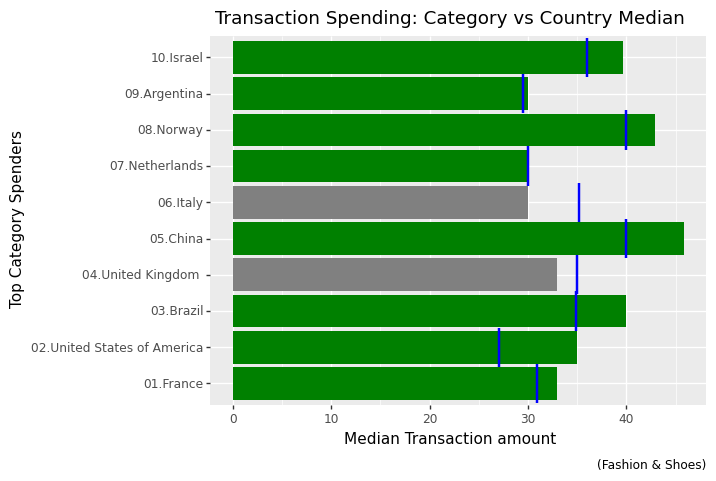

<ggplot: (8788475125932)>

In [63]:
Category='Fashion & Shoes'
Transaction_value=madrid_transactions[madrid_transactions['category']==Category] \
[['category','customer_country','country_rnk','Median Category-Country','Median Country','Amount_Ctry_Cat']].drop_duplicates() \
.sort_values(by='Amount_Ctry_Cat',ascending=False).head(10).sort_values(by='country_rnk',ascending=True)
Transaction_value.reset_index(drop=True,inplace=True)
Transaction_value['color']=np.where(Transaction_value['Median Category-Country']>Transaction_value['Median Country'],'green','grey')
Transaction_value['preference']=np.where(Transaction_value['Median Category-Country']>Transaction_value['Median Country'],'Prefered','')

ggplot(Transaction_value) +  geom_col(aes('country_rnk','Median Category-Country'),fill=Transaction_value['color']) + \
geom_point(aes('country_rnk',"Median Country"),color='blue',shape='|',size=15,stroke=1) \
+ xlab("Top Category Spenders") + ylab("Median Transaction amount") + ggtitle('Transaction Spending: Category vs Country Median') \
+ geom_text(aes(label='preference'), data=Transaction_value,x=Transaction_value.index+1,y=400)\
+ geom_text(aes(label='Amount_Ctry_Cat'), data=Transaction_value,x=Transaction_value.index+1,y=100)\
+ coord_flip() \
+ labs(caption =  "("+Category+")")

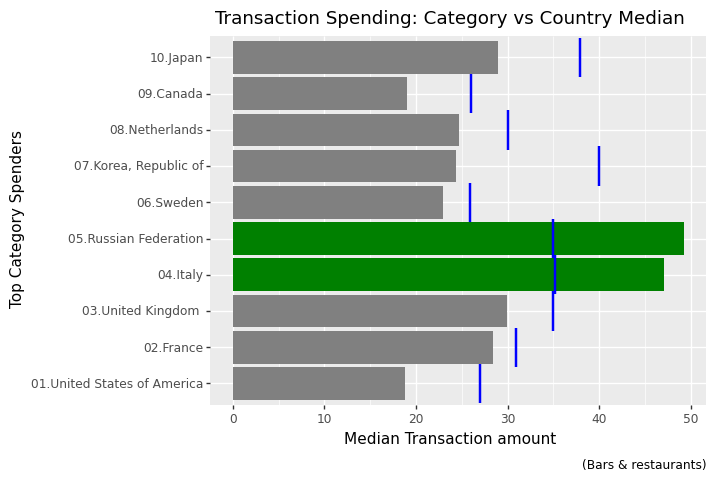

<ggplot: (8788436161711)>

In [64]:
Category='Bars & restaurants'
Transaction_value=madrid_transactions[madrid_transactions['category']==Category] \
[['category','customer_country','country_rnk','Median Category-Country','Median Country','Amount_Ctry_Cat']].drop_duplicates() \
.sort_values(by='Amount_Ctry_Cat',ascending=False).head(10).sort_values(by='country_rnk',ascending=True)
Transaction_value.reset_index(drop=True,inplace=True)
Transaction_value['color']=np.where(Transaction_value['Median Category-Country']>Transaction_value['Median Country'],'green','grey')
Transaction_value['preference']=np.where(Transaction_value['Median Category-Country']>Transaction_value['Median Country'],'Prefered','')

ggplot(Transaction_value) +  geom_col(aes('country_rnk','Median Category-Country'),fill=Transaction_value['color']) + \
geom_point(aes('country_rnk',"Median Country"),color='blue',shape='|',size=15,stroke=1) \
+ xlab("Top Category Spenders") + ylab("Median Transaction amount") + ggtitle('Transaction Spending: Category vs Country Median') \
+ geom_text(aes(label='preference'), data=Transaction_value,x=Transaction_value.index+1,y=400)\
+ geom_text(aes(label='Amount_Ctry_Cat'), data=Transaction_value,x=Transaction_value.index+1,y=100)\
+ coord_flip() \
+ labs(caption =  "("+Category+")")



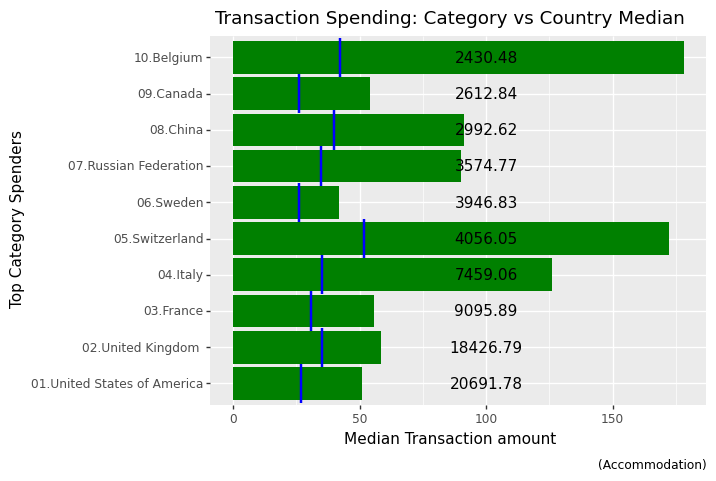

<ggplot: (8788474318821)>

In [65]:
Category='Accommodation'
Transaction_value=madrid_transactions[madrid_transactions['category']==Category] \
[['category','customer_country','country_rnk','Median Category-Country','Median Country','Amount_Ctry_Cat']].drop_duplicates() \
.sort_values(by='Amount_Ctry_Cat',ascending=False).head(10).sort_values(by='country_rnk',ascending=True)
Transaction_value.reset_index(drop=True,inplace=True)
Transaction_value['color']=np.where(Transaction_value['Median Category-Country']>Transaction_value['Median Country'],'green','grey')
Transaction_value['preference']=np.where(Transaction_value['Median Category-Country']>Transaction_value['Median Country'],'Prefered','')

ggplot(Transaction_value) +  geom_col(aes('country_rnk','Median Category-Country'),fill=Transaction_value['color']) + \
geom_point(aes('country_rnk',"Median Country"),color='blue',shape='|',size=15,stroke=1) \
+ xlab("Top Category Spenders") + ylab("Median Transaction amount") + ggtitle('Transaction Spending: Category vs Country Median') \
+ geom_text(aes(label='preference'), data=Transaction_value,x=Transaction_value.index+1,y=400)\
+ geom_text(aes(label='Amount_Ctry_Cat'), data=Transaction_value,x=Transaction_value.index+1,y=100)\
+ coord_flip() \
+ labs(caption =  "("+Category+")")

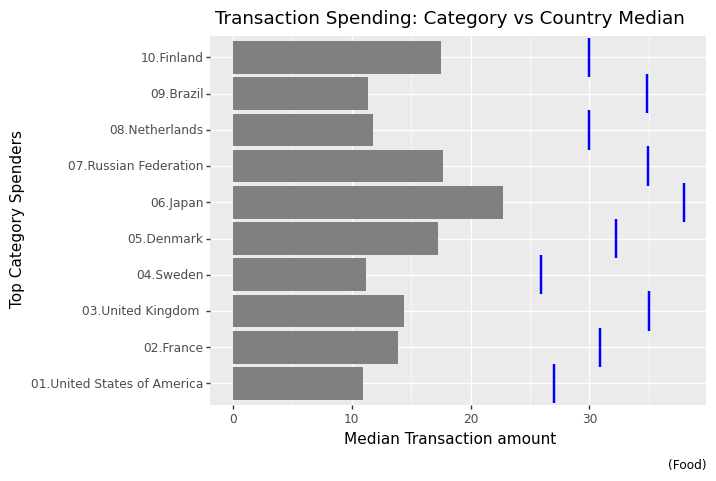

<ggplot: (8788454724581)>

In [66]:
Category='Food'
Transaction_value=madrid_transactions[madrid_transactions['category']==Category] \
[['category','customer_country','country_rnk','Median Category-Country','Median Country','Amount_Ctry_Cat']].drop_duplicates() \
.sort_values(by='Amount_Ctry_Cat',ascending=False).head(10).sort_values(by='country_rnk',ascending=True)
Transaction_value.reset_index(drop=True,inplace=True)
Transaction_value['color']=np.where(Transaction_value['Median Category-Country']>Transaction_value['Median Country'],'green','grey')
Transaction_value['preference']=np.where(Transaction_value['Median Category-Country']>Transaction_value['Median Country'],'Prefered','')

ggplot(Transaction_value) +  geom_col(aes('country_rnk','Median Category-Country'),fill=Transaction_value['color']) + \
geom_point(aes('country_rnk',"Median Country"),color='blue',shape='|',size=15,stroke=1) \
+ xlab("Top Category Spenders") + ylab("Median Transaction amount") + ggtitle('Transaction Spending: Category vs Country Median') \
+ geom_text(aes(label='preference'), data=Transaction_value,x=Transaction_value.index+1,y=400)\
+ geom_text(aes(label='Amount_Ctry_Cat'), data=Transaction_value,x=Transaction_value.index+1,y=100)\
+ coord_flip() \
+ labs(caption =  "("+Category+")")

In [67]:
Transaction_value

category customer_country                  country_rnk  \
0     Food               US  01.United States of America   
1     Food               FR                    02.France   
2     Food               GB           03.United Kingdom    
3     Food               SE                    04.Sweden   
4     Food               DK                   05.Denmark   
5     Food               JP                     06.Japan   
6     Food               RU        07.Russian Federation   
7     Food               NL               08.Netherlands   
8     Food               BR                    09.Brazil   
9     Food               FI                   10.Finland   

   Median Category-Country  Median Country  Amount_Ctry_Cat color preference  
0                   10.925           27.00           351.64  grey             
1                   13.875           30.92           214.05  grey             
2                   14.400           35.00           188.30  grey             
3                   11.200           25.92           108.33  grey             
4                   17.295           32.27           106.85  grey             
5                   22.740           37.94            97.27  grey             
6                   17.640           34.95            89.43  grey             
7                   11.815           29.99            69.42  grey             
8                   11.370           34.85            63.93  grey             
9                   17.500           29.96            63.05  grey

In [68]:
label_df=Transaction_value[['customer_country','Median Category-Country']]
label_df['Median Category-Country']=label_df['Median Category-Country']
label_df['label']='n='+label_df['Median Category-Country'].astype('str')
label_df

customer_country  Median Category-Country                 label
0               US                   10.925              n=10.925
1               FR                   13.875              n=13.875
2               GB                   14.400                n=14.4
3               SE                   11.200                n=11.2
4               DK                   17.295              n=17.295
5               JP                   22.740               n=22.74
6               RU                   17.640               n=17.64
7               NL                   11.815              n=11.815
8               BR                   11.370  n=11.370000000000001
9               FI                   17.500                n=17.5

In [69]:
label_df=Transaction_value[['customer_country','Median Category-Country']].groupby(['customer_country']).count().reset_index()
label_df['label']='n='+label_df['Median Category-Country'].astype('str')
label_df



customer_country  Median Category-Country label
0               BR                        1   n=1
1               DK                        1   n=1
2               FI                        1   n=1
3               FR                        1   n=1
4               GB                        1   n=1
5               JP                        1   n=1
6               NL                        1   n=1
7               RU                        1   n=1
8               SE                        1   n=1
9               US                        1   n=1

### Animations: Bar Races

### Top Country Spenders by the hour

MovieWriter ffmpeg unavailable; using Pillow instead.


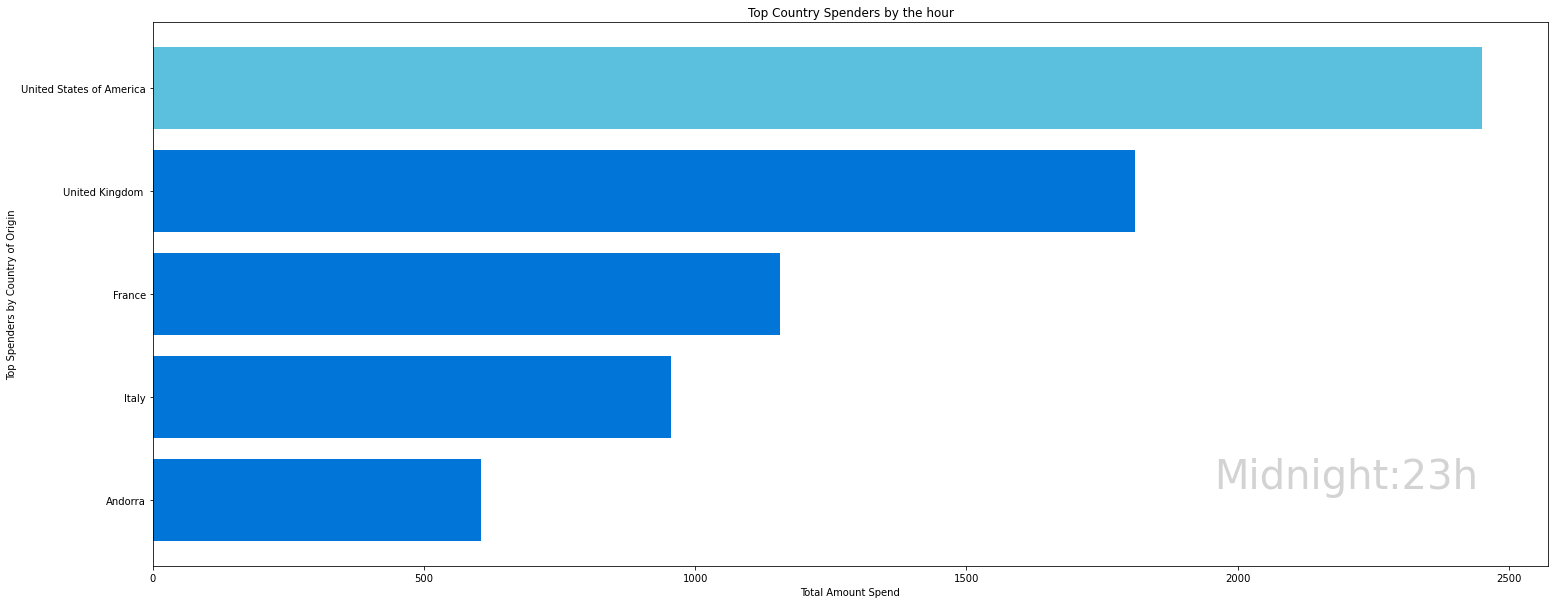

In [72]:
transaction_per_hour=madrid_transactions.groupby (['hour','customer_country','country_name','region'])['amount'].sum()
transaction_per_hour=transaction_per_hour.reset_index()

barchartrace_data  =transaction_per_hour.copy()
n_observations = 5
n_frames_between_states = 30

barchartrace_data= barchartrace_data.pivot('hour', ['customer_country','country_name'], 'amount')
barchartrace_data['hour'] = barchartrace_data.index

barchartrace_data.reset_index(drop = True, inplace = True)
barchartrace_data.index = barchartrace_data.index * n_frames_between_states
barchartrace_data =  barchartrace_data.reindex(range(barchartrace_data.index.max()+1))

barchartrace_data = barchartrace_data.interpolate()
barchartrace_data = barchartrace_data.melt(id_vars='hour', var_name =['customer_country','country_name'], value_name  = 'amount')



import math

n_observations = 5
fig, ax = plt.subplots(figsize=(25, 10))

font = {
    'weight': 'normal',
    'size'  :  40,
    'color': 'lightgray'
}

hours = barchartrace_data['hour'].unique()

label = ax.text(0.95, 0.20, hours[0],
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes,
                fontdict=font)
continent = transaction_per_hour[['customer_country','region']].drop_duplicates().reset_index(drop = True)

# # 2. Add continent info
barchartrace_data = barchartrace_data.merge(continent,left_on = 'customer_country', right_on = 'customer_country')
conditions = [
          barchartrace_data['region'] == 'Europe',
          barchartrace_data['region'] == 'Asia',
          barchartrace_data['region'] == 'Americas',
          barchartrace_data['region'] == 'Oceania',
          barchartrace_data['region'] == 'Africa',
 ]

values = ['#0275d8', '#5cb85c', '#5bc0de', '#f0ad4e', '#d9534f']

barchartrace_data['color'] = np.select(conditions, values)

df_daytime = madrid_transactions[['hour','daytime']].drop_duplicates().reset_index(drop = True).sort_values(by='hour')

barchartrace_data = barchartrace_data.merge(df_daytime,left_on = 'hour', right_on = 'hour',how='left')

def update_barchart_race(i):

    hour = hours[i]

    data_temp = barchartrace_data.loc[barchartrace_data['hour'] == hour, :]

    v_datetime =  barchartrace_data.loc[barchartrace_data['hour'] == math.floor(hour), :]['daytime'].unique().item()

    # Create rank and get first 10 countries
    data_temp['ranking'] = data_temp['amount'].rank(method = 'first',ascending = False)
    data_temp = data_temp.loc[data_temp['ranking'] <= n_observations]

    ax.clear()
    ax.barh(y = data_temp['ranking'] ,
            width = data_temp.amount, 
            tick_label=data_temp['country_name'],
#            ,color=colors)
            color=data_temp['color'])

    label = ax.text(0.95, 0.20, str(v_datetime)+':'+str(math.floor(hour))+'h',
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes,
                fontdict=font)
    plt.ylabel("Top Spenders by Country of Origin")
    plt.xlabel("Total Amount Spend")
    plt.title("Top Country Spenders by the hour")

    ax.set_ylim(ax.get_ylim()[::-1]) # Revert axis



anim = animation.FuncAnimation(fig, update_barchart_race, frames = len(hours), )
anim.save('barchart_race_Countries_notransition.gif', fps=10)  

In [74]:
### Top Category-Country Spenders by the hour

MovieWriter ffmpeg unavailable; using Pillow instead.


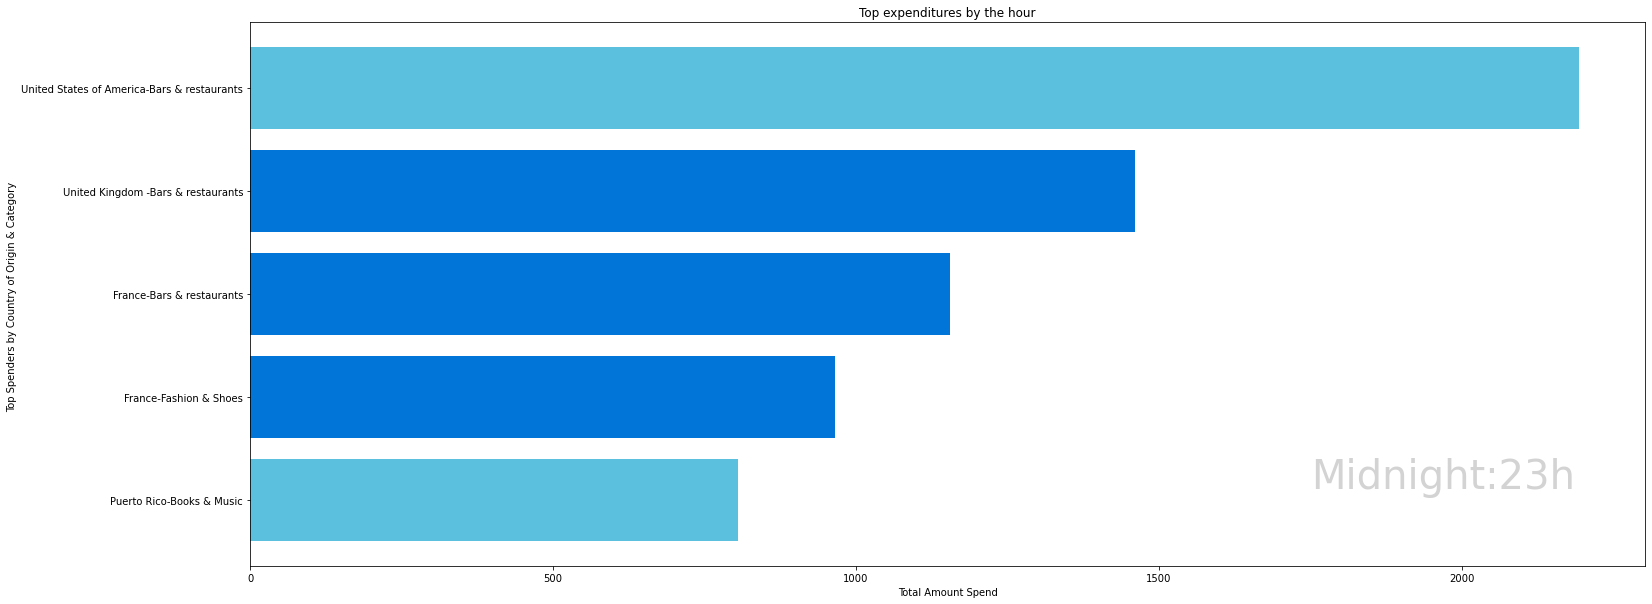

In [75]:
import textwrap

    
transaction_per_hour=madrid_transactions.groupby (['hour','customer_country','country-category','region'])['amount'].sum()
transaction_per_hour=transaction_per_hour.reset_index()
barchartrace_data  =transaction_per_hour.copy()
n_observations = 5
n_frames_between_states = 30

barchartrace_data= barchartrace_data.pivot('hour', ['customer_country','country-category'], 'amount')
barchartrace_data['hour'] = barchartrace_data.index
barchartrace_data.reset_index(drop = True, inplace = True)
barchartrace_data.index = barchartrace_data.index * n_frames_between_states
barchartrace_data =  barchartrace_data.reindex(range(barchartrace_data.index.max()+1))
barchartrace_data = barchartrace_data.interpolate()
barchartrace_data = barchartrace_data.melt(id_vars='hour', var_name =['customer_country','country-category'], value_name  = 'amount')



import math

n_observations = 5
fig, ax = plt.subplots(figsize=(25, 10))

font = {
    'weight': 'normal',
    'size'  :  40,
    'color': 'lightgray'
}

hours = barchartrace_data['hour'].unique()

label = ax.text(0.95, 0.20, hours[0],
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes,
                fontdict=font)
continent = transaction_per_hour[['customer_country','region']].drop_duplicates().reset_index(drop = True)

# # 2. Add continent info
barchartrace_data = barchartrace_data.merge(continent,left_on = 'customer_country', right_on = 'customer_country')
conditions = [
          barchartrace_data['region'] == 'Europe',
          barchartrace_data['region'] == 'Asia',
          barchartrace_data['region'] == 'Americas',
          barchartrace_data['region'] == 'Oceania',
          barchartrace_data['region'] == 'Africa',
 ]

values = ['#0275d8', '#5cb85c', '#5bc0de', '#f0ad4e', '#d9534f']

barchartrace_data['color'] = np.select(conditions, values)

df_daytime = madrid_transactions[['hour','daytime']].drop_duplicates().reset_index(drop = True).sort_values(by='hour')

barchartrace_data = barchartrace_data.merge(df_daytime,left_on = 'hour', right_on = 'hour',how='left')

def update_barchart_race(i):

    hour = hours[i]

    data_temp = barchartrace_data.loc[barchartrace_data['hour'] == hour, :]

    v_datetime =  barchartrace_data.loc[barchartrace_data['hour'] == math.floor(hour), :]['daytime'].unique().item()

    # Create rank and get first 10 countries
    data_temp['ranking'] = data_temp['amount'].rank(method = 'first',ascending = False)
    data_temp = data_temp.loc[data_temp['ranking'] <= n_observations]

    ax.clear()
    ax.barh(y = data_temp['ranking'] ,
            width = data_temp.amount, 
            tick_label= data_temp['country-category'] ,
#            ,color=colors)
            color=data_temp['color'])

    label = ax.text(0.95, 0.20, str(v_datetime)+':'+str(math.floor(hour))+'h',
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes,
                fontdict=font)
    plt.ylabel("Top Spenders by Country of Origin & Category ")
    plt.xlabel("Total Amount Spend")
    plt.title("Top expenditures by the hour")

    ax.set_ylim(ax.get_ylim()[::-1]) # Revert axis



anim = animation.FuncAnimation(fig, update_barchart_race, frames = len(hours), )
anim.save('barchart_race_Category_Countries_notransition.gif', fps=10)  

### Top Categories by the hour

MovieWriter ffmpeg unavailable; using Pillow instead.


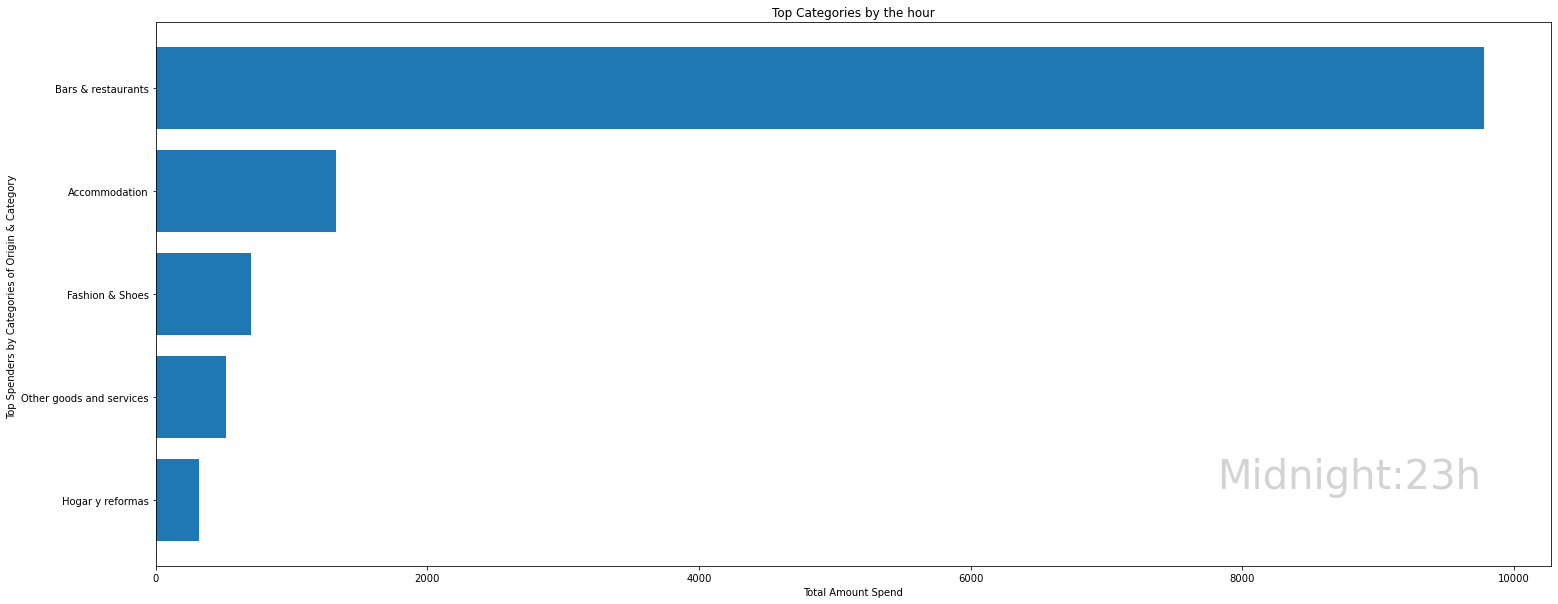

In [73]:
transaction_per_hour_cat=madrid_transactions.groupby (['hour','category'])['amount'].sum()
transaction_per_hour_cat=transaction_per_hour_cat.reset_index()
barchartrace_data  =transaction_per_hour_cat.copy()
n_observations = 5
n_frames_between_states = 30

barchartrace_data= barchartrace_data.pivot('hour', 'category', 'amount')
barchartrace_data['hour'] = barchartrace_data.index

barchartrace_data.reset_index(drop = True, inplace = True)
barchartrace_data.index = barchartrace_data.index * n_frames_between_states
barchartrace_data =  barchartrace_data.reindex(range(barchartrace_data.index.max()+1))

barchartrace_data = barchartrace_data.interpolate()
barchartrace_data = barchartrace_data.melt(id_vars='hour', var_name ='category', value_name  = 'amount')

import math

n_observations = 5
fig, ax = plt.subplots(figsize=(25, 10))

font = {
    'weight': 'normal',
    'size'  :  40,
    'color': 'lightgray'
}

hours = barchartrace_data['hour'].unique()


df_daytime = madrid_transactions[['hour','daytime']].drop_duplicates().reset_index(drop = True).sort_values(by='hour')

barchartrace_data = barchartrace_data.merge(df_daytime,left_on = 'hour', right_on = 'hour',how='left')

def update_barchart_race(i):

    hour = hours[i]

    data_temp = barchartrace_data.loc[barchartrace_data['hour'] == hour, :]

    v_datetime =  barchartrace_data.loc[barchartrace_data['hour'] == math.floor(hour), :]['daytime'].unique().item()

    # Create rank and get first 10 countries
    data_temp['ranking'] = data_temp['amount'].rank(method = 'first',ascending = False)
    data_temp = data_temp.loc[data_temp['ranking'] <= n_observations]

    ax.clear()
    ax.barh(y = data_temp['ranking'] ,
            width = data_temp.amount, 
            tick_label= data_temp['category'] )
#            ,color=colors)
#             color=data_temp['color'])

    label = ax.text(0.95, 0.20, str(v_datetime)+':'+str(math.floor(hour))+'h',
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes,
                fontdict=font)
    plt.ylabel("Top Spenders by Categories of Origin & Category ")
    plt.xlabel("Total Amount Spend")
    plt.title("Top Categories by the hour")

    ax.set_ylim(ax.get_ylim()[::-1]) # Revert axis



anim = animation.FuncAnimation(fig, update_barchart_race, frames = len(hours), )
anim.save('barchart_race_Category_notransition.gif', fps=10)  

In [33]:
df2.columns

Index(['country_name', 'Income_classification', 'mean_amount', 'sum_amount',
       'count_amount', 'median_amount', 'growth_GDP', 'GDP_per_capita',
       'log_mean_amount', 'percent', 'log_sum_amount', 'log_GDP_per_capita',
       'relative_MS'],
      dtype='object')

In [34]:
import plotly.express as px
import pandas as pd

fig = px.line_polar(df3, r='mean_amount', theta='category', line_close=True)
fig.update_traces(fill='toself')
fig.show()

In [76]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=US_FR['US_mean_amount'],
      theta=US_FR['category'],
      fill='toself',
      name='USA'
))

#fig.add_trace(go.Scatterpolar(
#      r=US_FR['CN_mean_amount'],
#      theta=US_FR['category'],
#      fill='toself',
#      name='China'
#))

fig.add_trace(go.Scatterpolar(
      r=US_FR['total_mean_amount'],
      theta=US_FR['category'],
      fill='toself',
      name='Total'
))

fig.add_trace(go.Scatterpolar(
      r=US_FR['UK_mean_amount'],
      theta=US_FR['category'],
      fill='toself',
      name='Uk'
))

fig.show()

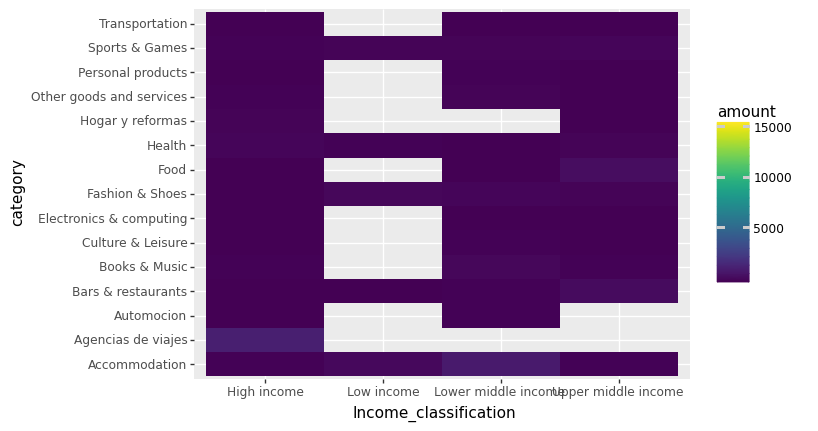

<ggplot: (8788452928446)>

In [36]:
# Heatmap 
ggplot(df, aes( "Income_classification","category", fill= "amount")) + \
geom_tile() 
#+ plotnine.theme(axis_text_x = plotnine.element_text(angle=90))

In [37]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                   z= df["amount"],
                   x=df['Income_classification'],
                   y=df["category"],
                   hoverongaps = False))
fig.show()

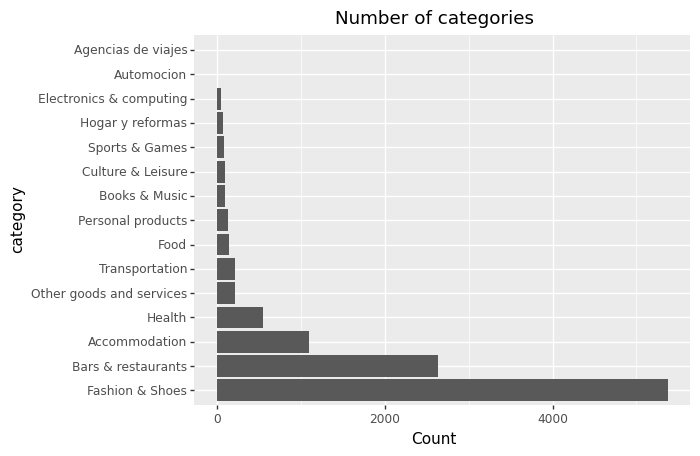

<ggplot: (8788417705509)>

In [38]:
# Determine order and create a categorical type
# Note that value_counts() is already sorted
cat_list = df['category'].value_counts().index.tolist()
df_cat = pd.Categorical(df['category'], categories=cat_list)

# assign to a new column in the DataFrame
df5 = df.assign(df_cat = df_cat)

(ggplot(df5)
 + aes(x='df_cat')
 + geom_bar(size=20)
 + coord_flip()
 + labs(y='Count', x='category', title='Number of categories')
)

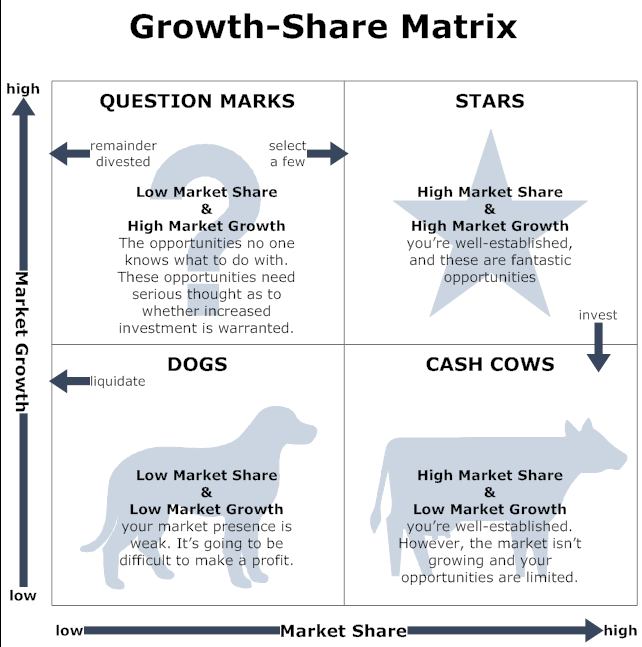

In [60]:
data = px.scatter(df2, x="relative_MS", y='growth_GDP',size='count_amount', color='Income_classification', hover_name='country_name',
                  size_max=20)

layout = go.Layout(
    title='Growth-Share Matrix of countries Madrid transactions',
    xaxis=dict(
        title='Relative of Purchases, 2012 [%]',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='GDP Growth, 2012 [%]',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(0,0,0,0)',
    plot_bgcolor='rgb(0,0,0,0)',
)

fig = go.Figure(data=data, layout=layout)

fig = fig.update_layout(
    yaxis_range=[-10,10], 
    title='BCG Matrix Countries Growth vs Market Share',
    yaxis=dict(title='GDP Growth, 2012 [%]'))    
fig.update_layout(
    xaxis_range=[-0,1.05],
    xaxis=dict(title='Relative Market Share of Purchases, 2012 [%]'))

fig.update_layout(template="simple_white")
fig.add_hline(y=0,line_width=2, line_dash="dash", line_color="black")
fig.add_vline(x=0.5, line_width=2, line_dash="dash", line_color="black")

fig.add_annotation(
    x=4
    , y=9
    , text='Question Mark'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)
fig.add_annotation(
    x=12
    , y=9
    , text='Stars'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)

fig.add_annotation(
    x=12
    , y=-9
    , text='Cash Cows'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)

fig.add_annotation(
    x=4
    , y=-9
    , text='Dogs'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)

In [40]:
data = px.scatter(df2, x="log_sum_amount", y='log_GDP_per_capita',size='mean_amount',trendline="ols", hover_name='country_name',
                  size_max=20)

layout = go.Layout(
    title='Growth-Share Matrix of countries Madrid transactions',
    xaxis=dict(
        title='median_amount, 2012 ',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='GDP per Capity, 2012 [%]',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(0,0,0,0)',
    plot_bgcolor='rgb(0,0,0,0)',
)

fig = go.Figure(data=data, layout=layout)

fig = fig.update_layout(
    yaxis_range=[-0,10], 
    title='BCG Matrix Capita vs median',
    yaxis=dict(title='log_GDP per capita, 2012 [%]'))    
fig.update_layout(
    xaxis_range=[-0,12],
    xaxis=dict(title='log_amount, 2012 [%]'))

fig.update_layout(template="simple_white")
fig.add_hline(y=60000,line_width=2, line_dash="dash", line_color="black")
fig.add_vline(x=8, line_width=2, line_dash="dash", line_color="black")

fig.add_annotation(
    x=4
    , y=9
    , text='Question Mark'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)
fig.add_annotation(
    x=12
    , y=9
    , text='Stars'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)

fig.add_annotation(
    x=12
    , y=-9
    , text='Cash Cows'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)

fig.add_annotation(
    x=4
    , y=-9
    , text='Dogs'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)

In [41]:
data = px.scatter(df1, x='relative_MS', y='growth_GDP', color='category',size='sum_amount_x', hover_name='country_name',
                  size_max=20)

layout = go.Layout(
    title='Growth-Share Matrix of countries Madrid transactions',
    xaxis=dict(
        title='Market Share of Purchases, 2012 [%]',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='GDP per Capity, 2012 [%]',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(0,0,0,0)',
    plot_bgcolor='rgb(0,0,0,0)',
)

fig = go.Figure(data=data, layout=layout)

fig = fig.update_layout(
    yaxis_range=[-10,10], 
    title='BCG Matrix Countries Growth vs Market Share',
    yaxis=dict(title='GDP growth, 2012 [%]'))    
fig.update_layout(
    xaxis_range=[0,1.05],
    xaxis=dict(title='Relative MS by category, 2012 [%]'))

fig.update_layout(template="simple_white")
fig.add_hline(y=0,line_width=2, line_dash="dash", line_color="black")
fig.add_vline(x=0.5, line_width=2, line_dash="dash", line_color="black")

fig.add_annotation(
    x=0.25
    , y=9
    , text='Question Mark'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)
fig.add_annotation(
    x=0.75
    , y=9
    , text='Stars'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)

fig.add_annotation(
    x=0.75
    , y=-9
    , text='Cash Cows'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)

fig.add_annotation(
    x=0.25
    , y=-9
    , text='Dogs'
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=13, color="grey", family="Sans Serif")
    , align="left"
    ,)

In [42]:
#pip install chart-studio

In [43]:
df3 =df.groupby(['category', 'hour'],as_index=False).agg(
    # Get max of the duration column for each group
    mean_amount=('amount', 'mean'),
    # Get min of the duration column for each group
    sum_amount=('amount', sum),
    # Get sum of the duration column for each group
    count_amount=('amount', 'count'),
)

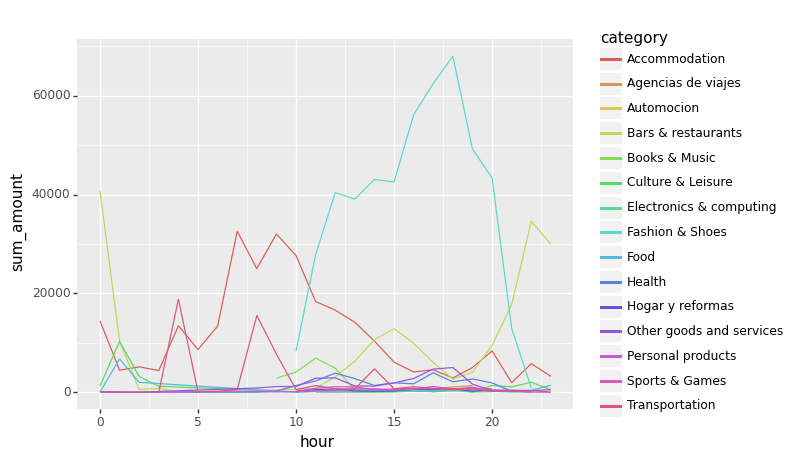

<ggplot: (8788453274841)>

In [44]:
ggplot(df3,aes(x="hour",y="sum_amount",color="category"))+geom_line()


In [45]:
custom_dict = {'Dawn': 0,'Morning': 1, 'Mid morning': 2, 'Afternoon': 3,'Evening': 4,'Night': 5,'Midight': 23}

In [46]:
df.sort_values(by=['daytime'], key=lambda x: x.map(custom_dict))

records  amount                  category customer_country   daytime  \
6488      6489   16.50        Bars & restaurants               NO      Dawn   
6390      6391  226.47             Accommodation               US      Dawn   
775        776   15.69        Bars & restaurants               GB      Dawn   
6391      6392   52.00             Accommodation               NL      Dawn   
6392      6393   18.00        Bars & restaurants               IE      Dawn   
...        ...     ...                       ...              ...       ...   
10550    10551  218.86        Bars & restaurants               IL  Midnight   
10622    10623   87.10        Bars & restaurants               US  Midnight   
10764    10765  192.65  Other goods and services               NL  Midnight   
10765    10766  200.00        Bars & restaurants               IT  Midnight   
10790    10791   48.25        Bars & restaurants               US  Midnight   

       hour            tx_date_proc    weekday       Date_new  numericcode  \
6488      0  2012-03-02 00:22:24+00  friday     02.03.12 00:22         578   
6390      1  2012-03-01 01:25:56+00  thursday   01.03.12 01:25         840   
775       0  2012-03-01 00:43:09+00  thursday   01.03.12 00:43         826   
6391      1  2012-03-01 01:35:33+00  thursday   01.03.12 01:35         528   
6392      2  2012-03-01 02:31:27+00  thursday   01.03.12 02:31         372   
...     ...                     ...        ...             ...         ...   
10550    23  2012-03-01 23:55:38+00  thursday   01.03.12 23:55         376   
10622    23  2012-03-02 23:41:52+00  friday     02.03.12 23:41         840   
10764    23  2012-03-01 23:23:01+00  thursday   01.03.12 23:23         528   
10765    23  2012-03-01 23:48:00+00  thursday   01.03.12 23:48         380   
10790    23  2012-03-02 23:01:19+00  friday     02.03.12 23:01         840   

       latitude(average)  longitude(average)              country_name  \
6488             62.0000             10.0000                    Norway   
6390             38.0000            -97.0000  United States of America   
775              54.0000             -2.0000           United Kingdom    
6391             52.5000              5.7500               Netherlands   
6392             53.0000             -8.0000                   Ireland   
...                  ...                 ...                       ...   
10550            31.5000             34.7500                    Israel   
10622            38.0000            -97.0000  United States of America   
10764            52.5000              5.7500               Netherlands   
10765            42.8333             12.8333                     Italy   
10790            38.0000            -97.0000  United States of America   

      alpha-3  country_code     iso_3166-2    region        sub_region  \
6488      NOR           578  ISO 3166-2:NO    Europe   Northern Europe   
6390      USA           840  ISO 3166-2:US  Americas  Northern America   
775       GBR           826  ISO 3166-2:GB    Europe   Northern Europe   
6391      NLD           528  ISO 3166-2:NL    Europe    Western Europe   
6392      IRL           372  ISO 3166-2:IE    Europe   Northern Europe   
...       ...           ...            ...       ...               ...   
10550     ISR           376  ISO 3166-2:IL      Asia      Western Asia   
10622     USA           840  ISO 3166-2:US  Americas  Northern America   
10764     NLD           528  ISO 3166-2:NL    Europe    Western Europe   
10765     ITA           380  ISO 3166-2:IT    Europe   Southern Europe   
10790     USA           840  ISO 3166-2:US  Americas  Northern America   

         GDP_USD_2012  GDP per capita (constant 2015 US$)  \
6488     509506317147                               73179   
6390   16253972230000                               54213   
775     2719158341006                               43100   
6391     838923319920                               44243   
6392     225496810957                 

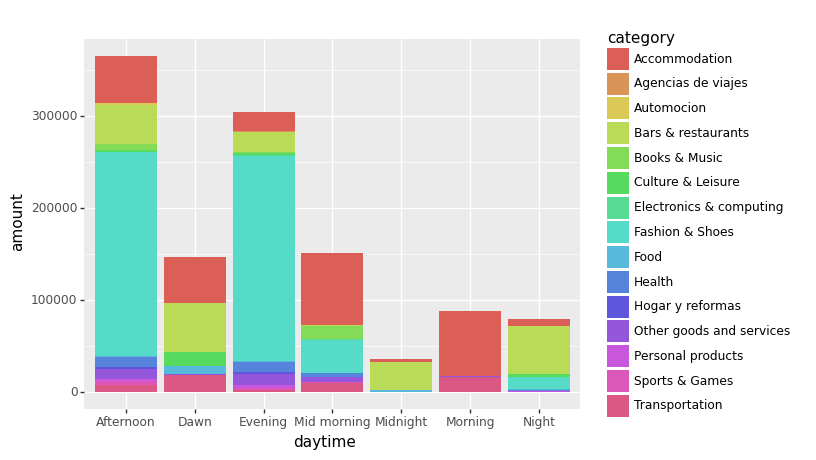

<ggplot: (8788474259360)>

In [47]:
import plotnine
plotnine.ggplot(df, plotnine.aes(x='daytime', y='amount')) + \
    plotnine.geom_col(plotnine.aes(fill = 'category')) 
#+ \
    #plotnine.stat_summary(plotnine.aes(label ='stat(y)'), fun_y = sum, geom = "text")
#plotnine.stat_summary(plotnine.aes(label ='stat(y)'), fun_y = sum, geom = "text")

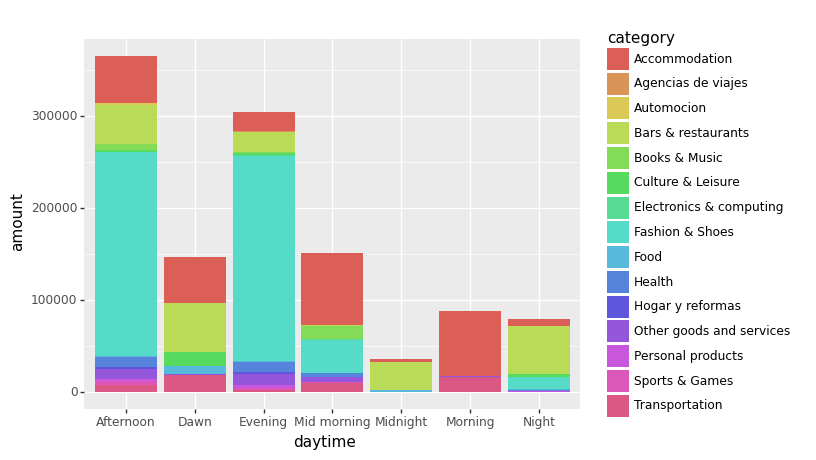

<ggplot: (8788453494119)>

In [48]:
plotnine.ggplot(df, plotnine.aes(x='daytime', y='amount')) + \
    plotnine.geom_col(plotnine.aes(fill = 'category')) 

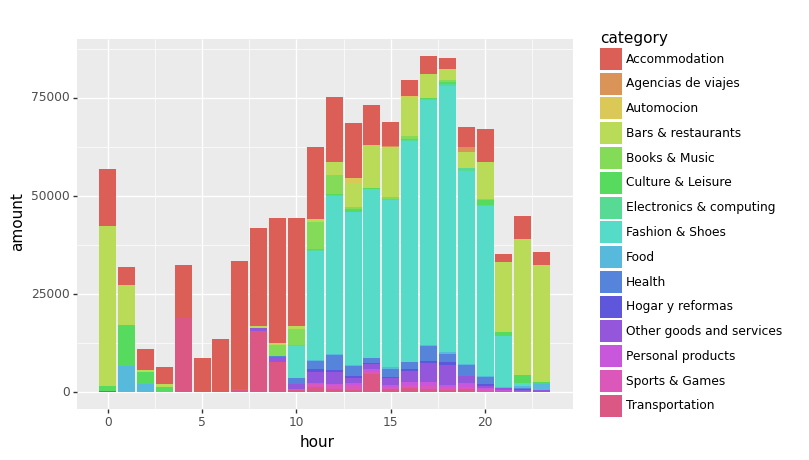

<ggplot: (8788453254114)>

In [49]:
import plotnine
plotnine.ggplot(df, plotnine.aes(x='hour', y='amount')) + \
    plotnine.geom_col(plotnine.aes(fill = 'category')) 

In [50]:
sum_amount=df.groupby('category').amount.sum()

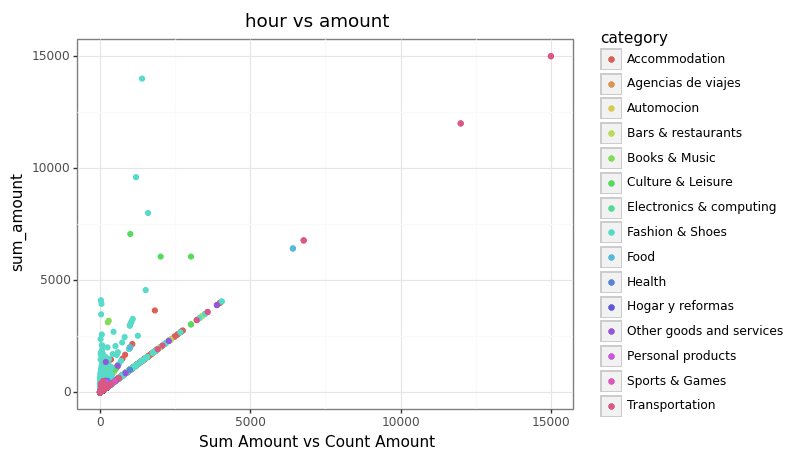

<ggplot: (8788436144306)>

In [51]:
(ggplot(df)+ aes(x="amount",y="amount", color='category')
 + geom_point()
 + plotnine.stat_summary(plotnine.aes(label ='stat(y)'), fun_y = sum, geom = "point")
 + labs(title='hour vs amount', x='Sum Amount vs Count Amount', y='sum_amount')
 + theme_bw()
)



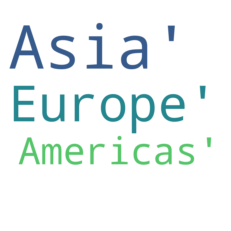

In [52]:
# Libraries

# Create a list of word
text=df['region'].values

# Create the wordcloud object
wordcloud = WordCloud(width=1000, height=1000, margin=0,background_color="white").generate(str(text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

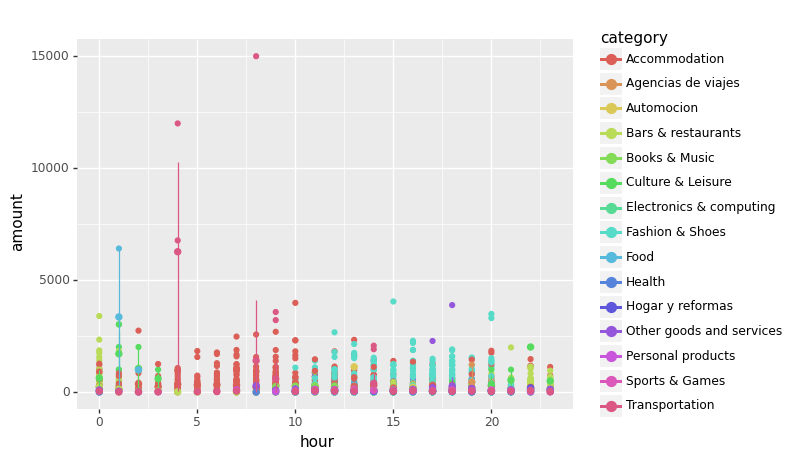

<ggplot: (8788417708849)>

In [53]:
plotnine.ggplot(df, plotnine.aes(x="hour",y="amount", color='category'))+ \
plotnine.geom_point()+ \
plotnine.stat_summary(plotnine.aes( geom = "text"))

In [54]:
#labs(title='hour vs amount', x='Engine Displacement, in Litres', y='Highway Miles per Gallon'))

In [55]:
import plotly.express as px
fig = px.treemap(df, path=[px.Constant("all"), 'region', 'customer_country'])
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [56]:
import plotly.express as px
fig = px.treemap(df, path=[px.Constant("all"), 'daytime', 'hour'])
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

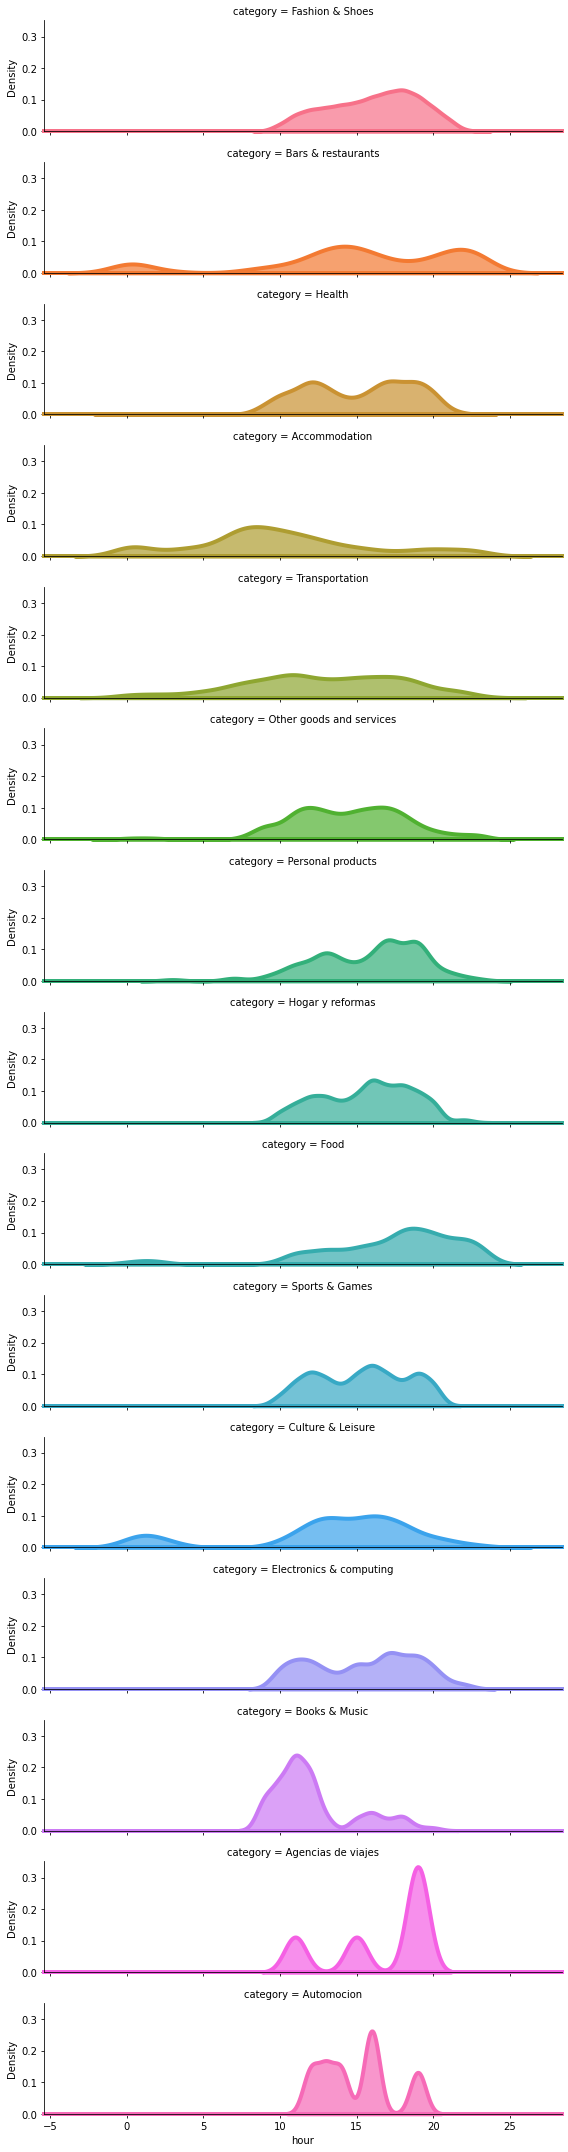

In [58]:
# Use FacetGrid to create the facet with one column
ridge_plot = sns.FacetGrid(df, row="category", hue="category", aspect=4, height=2.00)
# Use map function to make density plot in each element of the grid.
ridge_plot.map(sns.kdeplot, "hour", clip_on=False, shade=True, alpha=0.7, lw=4, bw=.2)
ridge_plot.map(plt.axhline, y=0, lw=4, clip_on=False)
ridge_plot.savefig("Ridgeline_plot_Seaborn_first_step.png")